In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install scikit-learn==1.3.0

In [4]:
df= pd.read_csv('/content/Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df=df.drop(columns=['Id'])

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

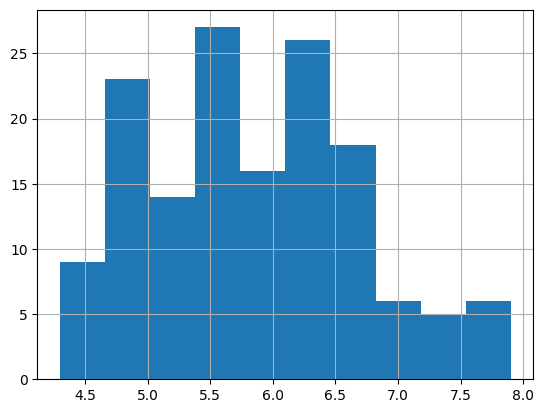

In [12]:
df['SepalLengthCm'].hist()

<Axes: >

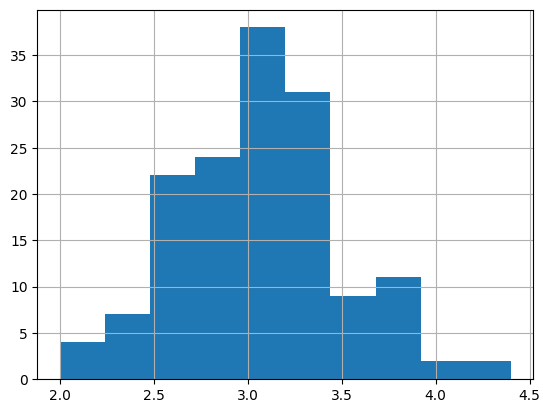

In [13]:
df['SepalWidthCm'].hist()

<Axes: >

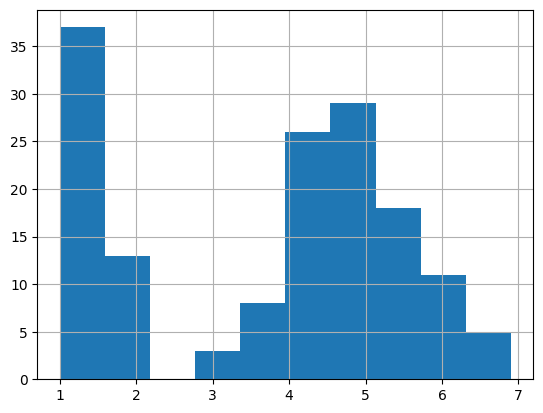

In [14]:
df['PetalLengthCm'].hist()

<Axes: >

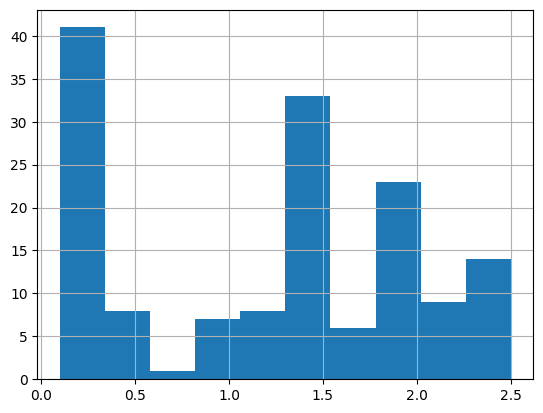

In [15]:
df['PetalWidthCm'].hist()

In [16]:
colors=['red','orange','blue']
species=['virginica','versicolor','sertosa']

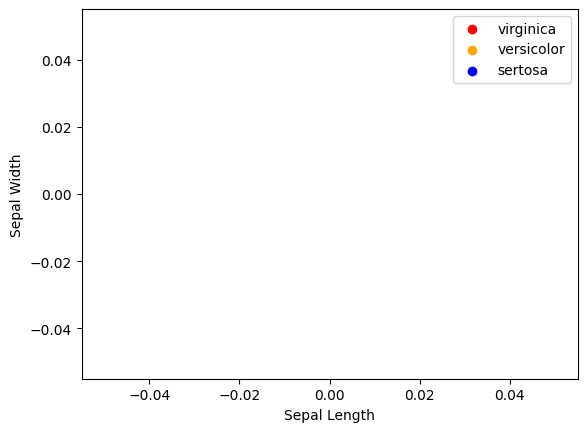

In [18]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [20]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<Axes: >

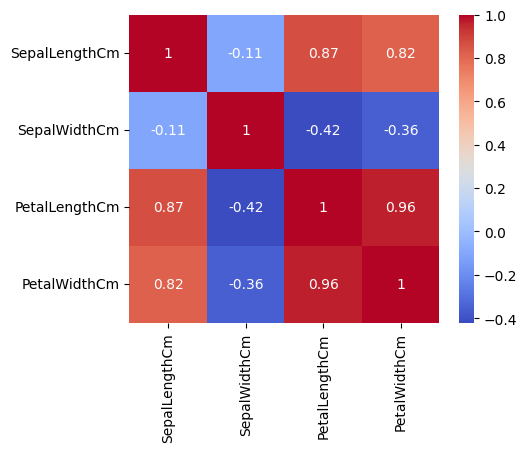

In [21]:
correlation_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True, ax=ax, cmap = 'coolwarm')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

x=df.drop(columns=['Species'])
y=df['Species']
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.30)

In [23]:
model=LogisticRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test)*100)

91.11111111111111


In [24]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [25]:
print(model.score(x_test,y_test) * 100)

91.11111111111111


In [28]:
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print(model.score(x_test,y_test)*100)

91.11111111111111


In [29]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [30]:
print(model.score(x_test,y_test)*100)

91.11111111111111


In [31]:
model = DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print(model.score(x_test,y_test)*100)

91.11111111111111


In [32]:
model.fit(x_train.values , y_train.values)

DecisionTreeClassifier()

In [33]:
print(model.score(x_test,y_test)*100)

95.55555555555556


In [34]:
import pickle
filename ='saved_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
import pickle

In [36]:
filename = 'saved_model.sav'
try:
  with open(filename,'wb') as file:
    pickle.dump(model,file)
  print("Model saved sucessfully")
except Exception as e:
  print(f"Error saving the model: {e}")

Model saved sucessfully


In [37]:
load_model = pickle.load(open(filename,'rb'))

In [39]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [40]:
import sklearn
print(sklearn.__version__)

1.3.0


In [41]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
148,6.2,3.4,5.4,2.3
6,4.6,3.4,1.4,0.3
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
112,6.8,3.0,5.5,2.1
